In [30]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import random
import string
from bitarray import bitarray

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline


Задание 2.
Используя определение, оценить сложность по радемахеру для логистической регресии на breast cancer dataset из scikit-learn (бинарная классификация). Подробнее в материалах лекции и на вики.
Построить график зависимости сложности по радемахеру от коэф L2 регуляризации для alpha=np.logspace(-2,2,5). 
Для каждой точки выполнить 100 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.
Не забудьте  предварительно применить к признакам standard scaling.

In [106]:
def get_logreg(X_train, y_train, alpha):
    clf = LogisticRegression(C=1/alpha, penalty='l2')
    clf.fit(X_train, y_train)
    return (clf.decision_function(X_train))

In [83]:
def get_data(data):
    seed = random.randint(1, 1000)
    X = data.data
    y = data.target
    stan = StandardScaler()
    X = stan.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random.randint(1, 1000))
    
    return (X_train, X_test, y_train, y_test)

In [103]:
def experiment (X_train, y_train, alpha):
    sigma = np.array([-1] * int(len(y_train)/2) + [1] * int(len(y_train) / 2))
    np.random.shuffle(sigma)
    h = get_logreg(X_train, y_train, alpha)
    return (np.average(sigma * h))

In [143]:
data = load_breast_cancer()

In [144]:
m_rdm = []
std_rdm = []
for alpha in np.logspace(-2, 2, 5):
    asd = []
    for n in tqdm(range(100)):
        X_train, X_test, y_train, y_test = get_data(data)
        asd.append(experiment(X_train, y_train, alpha))
    m_rdm.append(np.sum(asd)/100)
    std_rdm.append(np.std(asd))

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [145]:
m_rdm

[-0.13799649605281133,
 -0.0838812930645511,
 0.022943273660505657,
 0.026187907963375317,
 0.0027589217310665663]

In [146]:
std_rdm

[1.5226468895530496,
 0.8598060191649854,
 0.44426898493616207,
 0.2862730276072664,
 0.12312391438272105]

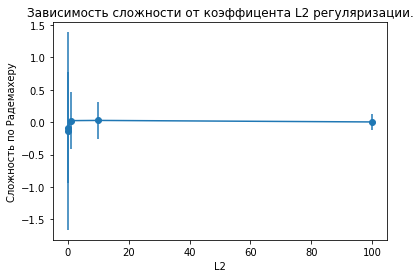

In [153]:
plt.errorbar(alpha, m_rdm, std_rdm, fmt='-o')
plt.title('Зависимость сложности от коэффицента L2 регуляризации.')
plt.xlabel('L2')
plt.ylabel('Сложность по Радемахеру');

Чем больше коэффицент alpha, тем меньше радемахеровcкая сложность. Стандартное отклонение так же падает.

Задание 1.
Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). Подробнее в материалах лекции.
Построить графики зависимости FPR от длинны строк L и простого модуля p.
Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000)
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке

In [2]:
def is_prime():
    primes = []
    for a in range(100, 1000):
        if all(a % i for i in range(2, a)) is True and a not in primes:
            primes.append(a)
    return(random.sample(primes, 10))

In [3]:
def rand_lines(l):
    lines = []
    for i in range(1000):
        line = ''.join(random.choice(string.ascii_lowercase) for _ in range(l))
        lines.append(line)
    return (lines)

In [4]:
def hash_int(x, p, a=456, b=7):
    return (a*x + b) % p

In [5]:
def poly_hash(line, p):
    h = 0
    x = 45
    for i in range(0, len(line)):
        h = (h * x + ord(line[i]) + p) % p
    return hash_int(h, p)

In [6]:
L = np.linspace(10, 100, 11)
primes = is_prime()
primes.sort()

In [7]:
L

array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.])

In [8]:
primes

[271, 293, 311, 449, 617, 797, 809, 839, 857, 919]

Фиксируем p. Смотрим зависимость от длины строк.

In [9]:
mean_L = []
std_L = []
p = random.choice(primes)
fpr_L = []
for l in L:
    add = []
    for i in range(10): #для mean и std. Для простого замера записываем только последний результат.
        f = 0
        lines = rand_lines(int(l))
        bitarr = bitarray('0' * p)

        for line in lines:
            has = poly_hash(line, p)
            if bitarr[has] == 0: 
                bitarr[has] = 1
            elif bitarr[has] == 1:
                f += 1
        add.append(f * 2 / (1000 * (1000 - 1)))
    mean_L.append(np.mean(add))
    std_L.append(np.std(add))        
    fpr_L.append(f * 2 / (1000 * (1000 - 1)))

In [11]:
fpr_L

[0.0008608608608608609,
 0.0008408408408408409,
 0.0008708708708708709,
 0.0008428428428428428,
 0.0008488488488488489,
 0.0008468468468468468,
 0.0008888888888888889,
 0.0008648648648648649,
 0.0008408408408408409,
 0.0008748748748748749,
 0.0008588588588588588]

In [12]:
mean_L

[0.0008496496496496496,
 0.0008476476476476476,
 0.000855055055055055,
 0.0008514514514514516,
 0.0008408408408408407,
 0.0008520520520520521,
 0.00085985985985986,
 0.0008638638638638639,
 0.0008552552552552552,
 0.0008558558558558558,
 0.0008596596596596596]

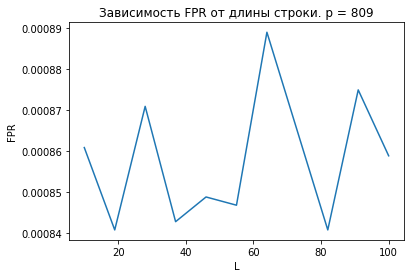

In [13]:
plt.title('Зависимость FPR от длины строки. p = ' + str(p))
plt.xlabel('L')
plt.ylabel('FPR')
plt.plot(L, fpr_L);

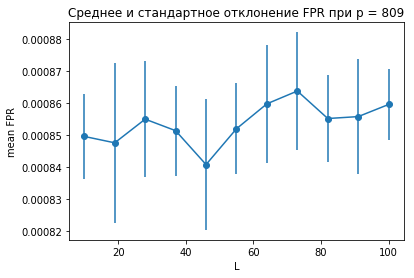

In [14]:
plt.errorbar(L, mean_L, std_L, fmt='-o')
plt.title('Среднее и стандартное отклонение FPR при p = ' + str(p))
plt.xlabel('L')
plt.ylabel('mean FPR');

Фиксируем L. Смотрим зависимость от длины строк.

In [15]:
mean_p = []
std_p = []
l = random.choice(L)
fpr_p = []
for p in primes:
    add = []
    for i in range(10): #для mean и std. Для простого замера записываем только последний результат.
        f = 0
        lines = rand_lines(int(l))
        bitarr = bitarray('0' * p)

        for line in lines:
            has = poly_hash(line, p)
            if bitarr[has] == 0: 
                bitarr[has] = 1
            elif bitarr[has] == 1:
                f += 1
        add.append(f * 2 / (1000 * (1000 - 1)))
    mean_p.append(np.mean(add))
    std_p.append(np.std(add))        
    fpr_p.append(f * 2 / (1000 * (1000 - 1)))

In [16]:
fpr_p

[0.0014694694694694695,
 0.0014494494494494495,
 0.0013973973973973974,
 0.0011831831831831832,
 0.001015015015015015,
 0.0008708708708708709,
 0.0008748748748748749,
 0.0008428428428428428,
 0.0008068068068068068,
 0.0007907907907907908]

In [17]:
mean_p

[0.001473073073073073,
 0.0014398398398398399,
 0.0014046046046046047,
 0.0011977977977977979,
 0.0010114114114114113,
 0.0008570570570570569,
 0.0008582582582582581,
 0.0008348348348348348,
 0.0008156156156156157,
 0.0007811811811811811]

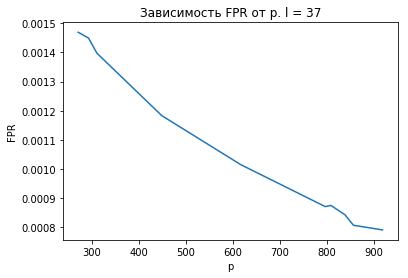

In [19]:
plt.title('Зависимость FPR от p. l = ' + str(int(l)))
plt.xlabel('p')
plt.ylabel('FPR')
plt.plot(primes, fpr_p);

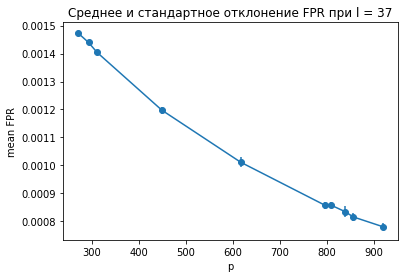

In [20]:
plt.errorbar(primes, mean_p, std_p, fmt='-o')
plt.title('Среднее и стандартное отклонение FPR при l = ' + str(int(l)))
plt.xlabel('p')
plt.ylabel('mean FPR');